# Best selling books analysis 

### Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
costum_colors = ["#11999E","#FEBD69","#40514E","#146EB4","#F2F2F2","#37475A"]
sns.set_palette(sns.color_palette(Amz_palette))
sns.palplot(Amz_palette)

In [3]:
books = "output/combined_book2.csv"
books_df = pd.read_csv(books)
books_df.head()

,rank,primary_isbn13,publisher,title,author,category,pub_date,Amazon Product ID,Amazon Rating,Amazon Rating Total,Amazon Price
0,11,9781982168018,Gallery,TASTE,Stanley Tucci,Hardcover Nonfiction,2022-02-06,1982168013,4.7,3118.0,14.00
1,8,9780062888341,Harper,THE STRANGER IN THE LIFEBOAT,Mitch Albom,Hardcover Fiction,2022-02-06,006288834X,4.6,9966.0,15.07
2,10,9780385547932,Doubleday,TO PARADISE,Hanya Yanagihara,Hardcover Fiction,2022-02-06,B091XWH5T2,4.2,204.0,14.99
3,11,9780593465066,Viking,CALL US WHAT WE CARRY,Amanda Gorman,Hardcover Fiction,2022-02-06,0593465067,4.9,1794.0,14.53
4,12,9781982168438,Scribner,CLOUD CUCKOO LAND,Anthony Doerr,Hardcover Fiction,2022-02-06,B08TRMSR3Z,4.5,8792.0,15.99


In [4]:
len(books_df)

860

### Reorganizing the columns

In [5]:
books_df.columns = ['NYT Ranking', 'ISBN', 'Publisher', 'Title', 'Author', 'Book Subcategory',
       'NYT Pub Date', 'Amazon Product ID', 'Amz Star ratings', 'Total_num_of_rating',
       'Amazon Price']


column_names=['Title','Author','Book Subcategory','NYT Ranking', 'Amz Star ratings', 'Total_num_of_rating',
              'Amazon Price','ISBN', 'Publisher', 'NYT Pub Date', 'Amazon Product ID',]  
       
books_df = books_df.reindex(columns=column_names)
books_df

,Title,Author,Book Subcategory,NYT Ranking,Amz Star ratings,Total_num_of_rating,Amazon Price,ISBN,Publisher,NYT Pub Date,Amazon Product ID
0,TASTE,Stanley Tucci,Hardcover Nonfiction,11,4.7,3118.0,14.00,9781982168018,Gallery,2022-02-06,1982168013
1,THE STRANGER IN THE LIFEBOAT,Mitch Albom,Hardcover Fiction,8,4.6,9966.0,15.07,9780062888341,Harper,2022-02-06,006288834X
2,TO PARADISE,Hanya Yanagihara,Hardcover Fiction,10,4.2,204.0,14.99,9780385547932,Doubleday,2022-02-06,B091XWH5T2
3,CALL US WHAT WE CARRY,Amanda Gorman,Hardcover Fiction,11,4.9,1794.0,14.53,9780593465066,Viking,2022-02-06,0593465067
4,CLOUD CUCKOO LAND,Anthony Doerr,Hardcover Fiction,12,4.5,8792.0,15.99,9781982168438,Scribner,2022-02-06,B08TRMSR3Z
...,...,...,...,...,...,...,...,...,...,...,...
855,"THE WALKING DEAD, RISE OF THE GOVERNOR",Robert Kirkman and Jay Bonansinga,Combined Print Fiction,18,4.5,930.0,0.00,9780312547745,St. Martin's Press,2012-11-04,B009RFHNB8
856,MAD RIVER,John Sandford,Combined Print Fiction,15,4.6,3011.0,9.99,9780399157707,Penguin Group,2012-11-04,B0085DP6EY
857,THE SECRET KEEPER,Kate Morton,Combined Print Fiction,12,4.5,7219.0,0.00,9781439152805,Atria Books,2012-11-04,B009R5Q51W
858,THE TWELVE,Justin Cronin,Combined Print Fiction,2,4.5,4496.0,0.00,9780345504982,Random House Publishing,2012-11-04,B009RFGP8K


In [6]:
#making the Amazon Product ID as index
books_df.set_index('Amazon Product ID',inplace=True)

In [7]:
books_df.duplicated(subset=['ISBN']).sum()

38

In [8]:
books_df.drop_duplicates(subset=['ISBN'],inplace=True)

In [9]:
books_df.drop_duplicates(subset=['Title','Author','Book Subcategory','Amz Star ratings','Total_num_of_rating','Publisher'],inplace=True)

In [15]:
#drop the rows with book subcategory of Audio Fiction and Audio Nonfiction
books_df.drop(books_df[books_df['Book Subcategory'] == 'Audio Fiction'].index, inplace = True)
books_df.drop(books_df[books_df['Book Subcategory'] == 'Audio Nonfiction'].index, inplace = True)

In [16]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 811 entries, 1982168013 to B0061YXJO8
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                811 non-null    object 
 1   Author               811 non-null    object 
 2   Book Subcategory     811 non-null    object 
 3   NYT Ranking          811 non-null    int64  
 4   Amz Star ratings     811 non-null    float64
 5   Total_num_of_rating  811 non-null    float64
 6   Amazon Price         811 non-null    float64
 7   ISBN                 811 non-null    object 
 8   Publisher            811 non-null    object 
 9   NYT Pub Date         811 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 69.7+ KB


### The number of books in every category

In [17]:
books_df['Book Subcategory'].value_counts()

E-Book Fiction               206
Combined Print Fiction       146
E-Book Nonfiction            140
Combined Print Nonfiction    112
Hardcover Nonfiction         109
Hardcover Fiction             98
Name: Book Subcategory, dtype: int64

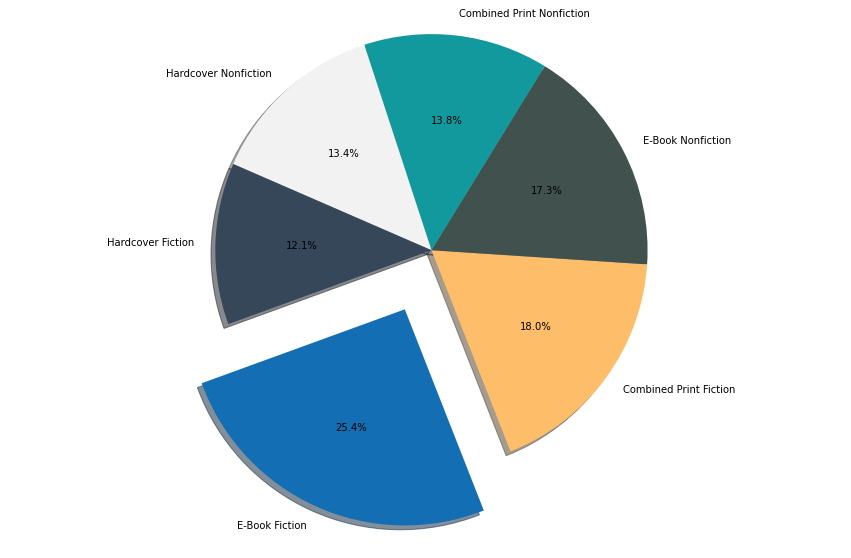

In [26]:

plt.figure(figsize=(15,10))
total_categories=books_df['Book Subcategory'].value_counts().to_dict()
categories=list(total_categories.keys())
totals_values=list(total_categories.values())

colors = ["#146EB4","#FEBD69","#40514E","#11999E","#F2F2F2","#37475A"]
explode = (0.3,0,0,0,0,0)


plt.pie(totals_values, explode=explode, labels=categories, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

plt.axis("equal")

plt.savefig('images/book_number.png')
plt.show()

In [ ]:
### Observation: E-book fiction is the largest category of books in our sample, followed by combined print fiction and e-book nonfiction.

### What are the top ten rated books on Amazon and their authors?

In [18]:
#Top Rating Books
Top_Rating_Books_df=books_df.sort_values(by="Amz Star ratings", ascending=False)\
[["Book Subcategory", "Title", "Author","Amz Star ratings","Total_num_of_rating"]].head(10)


Top_Rating_Books_df

,Book Subcategory,Title,Author,Amz Star ratings,Total_num_of_rating
Amazon Product ID,,,,,
9123962984,Combined Print Nonfiction,QUIET,Susan Cain,5.0,3.0
9124120162,Hardcover Nonfiction,THE BOMBER MAFIA,Malcolm Gladwell,5.0,1.0
9124125288,Hardcover Fiction,PROJECT HAIL MARY,Andy Weir,5.0,2.0
B09RMD6MQD,Hardcover Fiction,ROCK PAPER SCISSORS,Alice Feeney,5.0,10.0
0999208314,Hardcover Nonfiction,RED-HANDED,Peter Schweizer,4.9,45.0
150113597X,Hardcover Nonfiction,AMERICAN MARXISM,Mark R. Levin,4.9,26872.0
145217380X,E-Book Fiction,A DOG'S PURPOSE,W Bruce Cameron,4.9,14707.0
0385347057,Combined Print Nonfiction,SUM IT UP,Pat Head Summitt with Sally Jenkins,4.9,1134.0
0593241312,Hardcover Nonfiction,IMMUNE,Philipp Dettmer,4.9,2286.0


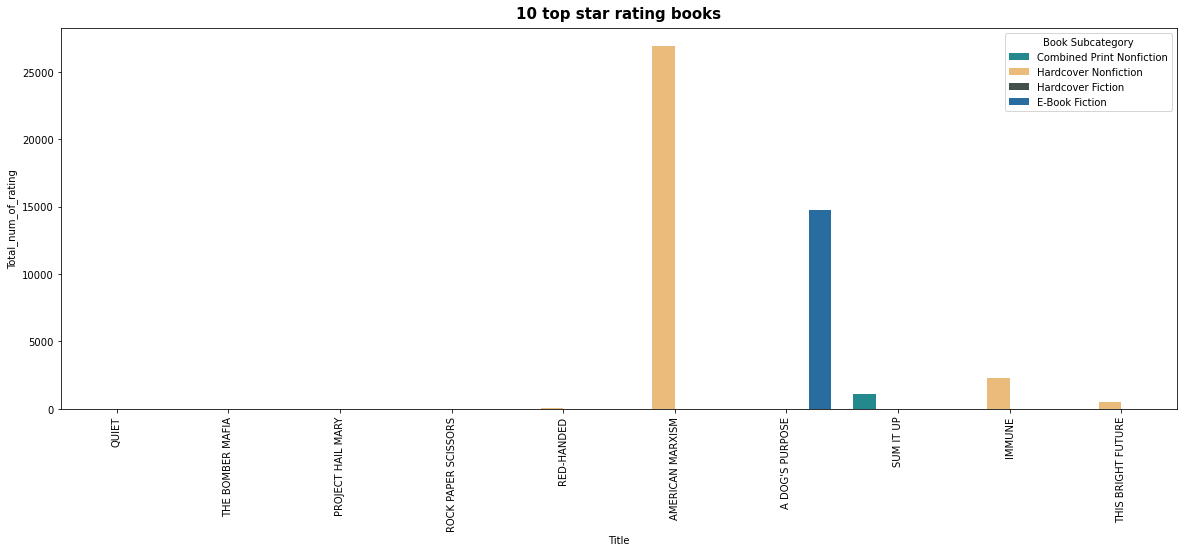

In [31]:
plt.figure(figsize=(20,7))
sns.barplot(x="Title", y="Total_num_of_rating", data=Top_Rating_Books_df,hue='Book Subcategory',palette=costum_colors)
plt.title('10 top star rating books',fontsize= 15,pad=10,fontweight="bold")
plt.xticks(rotation="vertical")
plt.savefig('images/top10_star_rating.png')
#plt.tight_layout()

#### Observation: While a few books have high ratings, they did not appear to be very popular, based on the number of reviews.

### What is the average price for each category?

In [19]:
# price_average for every category
price_mean=books_df.groupby('Book Subcategory').mean()["Amazon Price"].to_frame().sort_values(by='Amazon Price',
ascending=False)
price_mean

,Amazon Price
Book Subcategory,
Hardcover Nonfiction,15.871927
Hardcover Fiction,13.254592
Combined Print Nonfiction,10.375536
Combined Print Fiction,7.650616
E-Book Nonfiction,7.089429
E-Book Fiction,6.891214


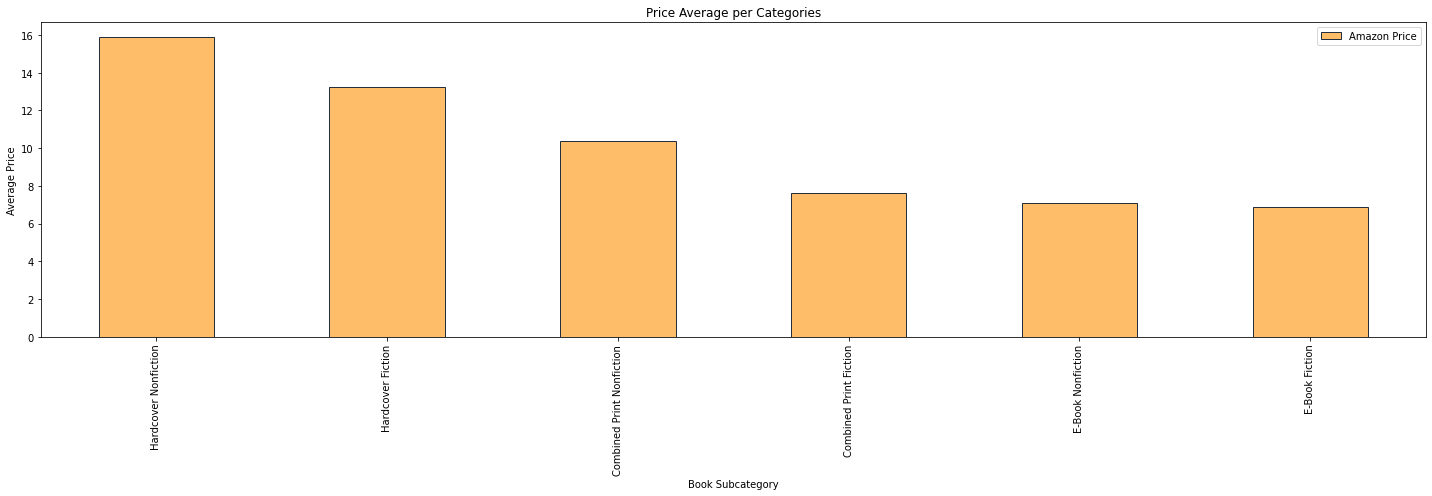

In [34]:
# Price Average per Categories
price_mean.plot(kind="bar", figsize=(20,7),facecolor='#FEBD69',edgecolor='#232F3E')

# Set a title for the chart
plt.title("Price Average per Categories")
plt.ylabel('Average Price')
plt.tight_layout()
plt.savefig('images/Average_book_price.png')
plt.show()

In [ ]:
### Observation: Hardcover fiction and hardcover fiction appear to be the most expensive books. 
### E-book fiction and e-book non-fiction appear to be the least expensive books.

### What is the average number of ratings in each category? 

In [20]:
avg_rate_df=books_df.groupby('Book Subcategory').mean()['Total_num_of_rating'].sort_values(ascending=False)
avg_rate_df.to_frame()

,Total_num_of_rating
Book Subcategory,
Hardcover Fiction,10675.836735
Combined Print Fiction,5309.376712
E-Book Fiction,5040.000000
Hardcover Nonfiction,4173.568807
Combined Print Nonfiction,3180.866071
E-Book Nonfiction,2977.571429


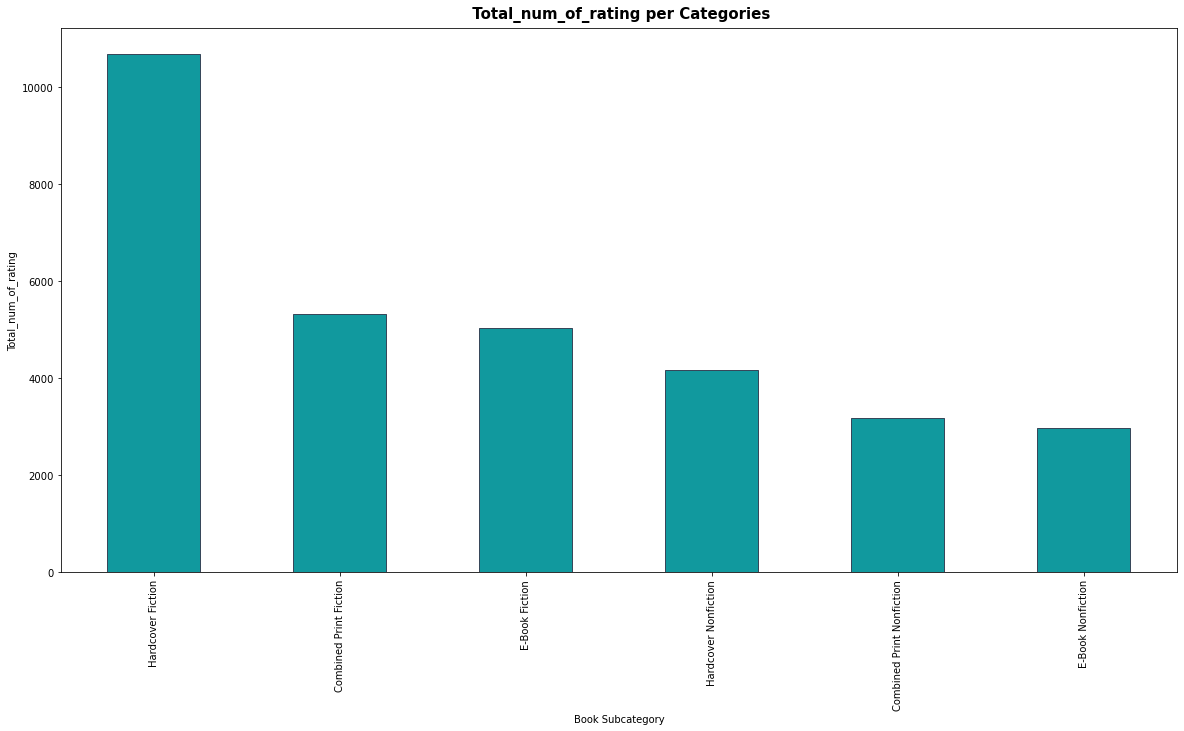

In [38]:
plt.figure(figsize=(15,7))

avg_rate_df.plot(kind='bar',facecolor='#11999E',edgecolor='#37475A')
plt.title(" Total_num_of_rating per Categories",fontsize= 15,pad=10,fontweight="bold")
plt.ylabel('Total_num_of_rating')
plt.gcf().set_size_inches(20, 10)
plt.savefig('images/Average_num_rated_books.png')
plt.show()

In [ ]:
### Observation: Hardcover fiction books are the most popular books, with over 10,000 ratings, on average. 

### What is the range of star rate in every category?

In [21]:
#Create bins
bins = [ 2, 3, 4 , 5]
# Create the names for the four bins
group_names = ["<3", '3-4',"4-5"]
data_rate_baced_df=books_df.copy()
data_rate_baced_df['Amz Star ratings_']=pd.cut(data_rate_baced_df['Amz Star ratings'], bins, labels=group_names,include_lowest=True)
data_rate_baced_df1=data_rate_baced_df.groupby(['Book Subcategory','Amz Star ratings_']).count()['Total_num_of_rating']\
.reset_index().pivot_table(values='Total_num_of_rating',index=['Book Subcategory'],columns=['Amz Star ratings_'])
data_rate_baced_df1

Amz Star ratings_,<3,3-4,4-5
Book Subcategory,,,
Combined Print Fiction,0,11,135
Combined Print Nonfiction,0,7,105
E-Book Fiction,0,9,197
E-Book Nonfiction,0,5,135
Hardcover Fiction,0,11,87
Hardcover Nonfiction,1,2,106


#### Observation: There is a bestselling book that has a star rate of less than 3 on Amazon! Otherwise, most books appear to have between a 4-5 star rating on Amazon, which may not be surprising since these are NYT bestsellers.

In [ ]:
#### The number of ratings for each book category

<Figure size 1440x720 with 0 Axes>

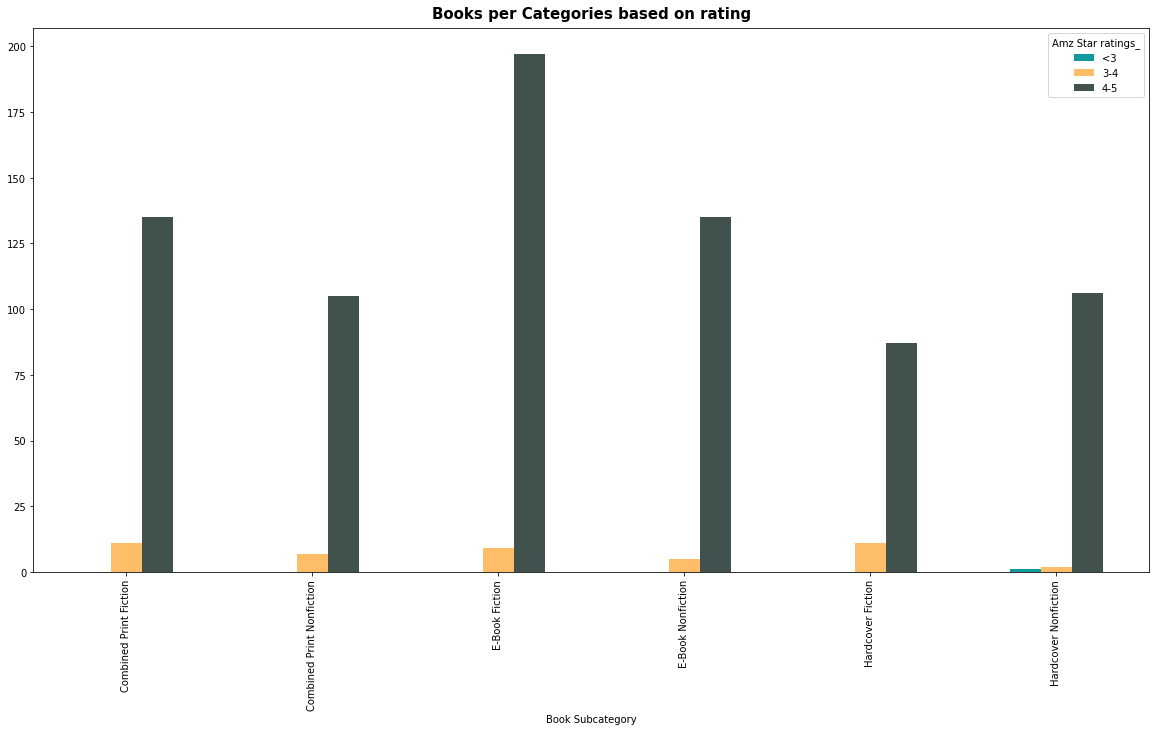

In [41]:
plt.figure(figsize=(20,10))
data_rate_baced_df1.plot.bar()
plt.title("Books per Categories based on rating",fontsize= 15,pad=10,fontweight="bold")
plt.savefig('images/Books_per_Categories_based_rating.png')
plt.gcf().set_size_inches(20, 10)

In [ ]:
#### Observation: Across all categories, the books in our dataset appear to be highly rated on Amazon.
### E-book fiction appears to have the most highly rated books out of all of the categories.

In [22]:
#Creating bins
bins = [ 2, 3, 4 , 5]
# Create the names for the four bins
group_names = ["<3", '3-4',"4-5"]
data_rate_baced_df=books_df.copy()
data_rate_baced_df['Amz Star ratings_']=pd.cut(data_rate_baced_df['Amz Star ratings'], bins, labels=group_names,include_lowest=True)
data_rate_baced_df1=data_rate_baced_df.groupby(['Amz Star ratings_']).sum()['Total_num_of_rating']
#.reset_index().pivot_table(values='Total_num_of_rating',index=['Book Subcategory'],columns=['Amz Star ratings_'])
data_rate_baced_df1.to_frame()

,Total_num_of_rating
Amz Star ratings_,
<3,2.0
3-4,197327.0
4-5,3890348.0


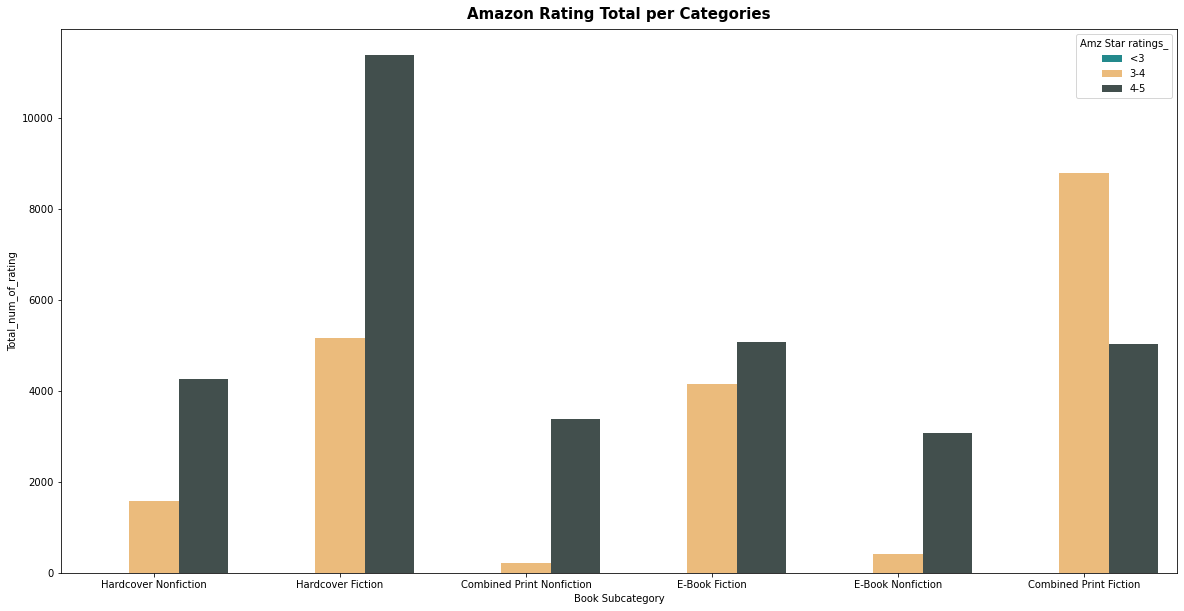

In [44]:
plt.figure(figsize=(20,10))
sns.barplot(x="Book Subcategory", y="Total_num_of_rating",hue='Amz Star ratings_', data=data_rate_baced_df,
            ci=None,palette=costum_colors)
plt.title("Amazon Rating Total per Categories",fontsize= 15,pad=10,fontweight="bold")
plt.savefig('images/Amazon_Rating_Total_per_Categories.png')

In [ ]:
###Observation: It appears that the hardcover fiction category was the most popular, 
### and had the highest Amazon rating category of between 4-5 starts.

### Which book has the lowest rating?

In [23]:
books_df.loc[books_df['Amz Star ratings']<3]

,Title,Author,Book Subcategory,NYT Ranking,Amz Star ratings,Total_num_of_rating,Amazon Price,ISBN,Publisher,NYT Pub Date
Amazon Product ID,,,,,,,,,,
9124143693,PERIL,Bob Woodward and Robert Costa,Hardcover Nonfiction,9,2.5,2.0,64.99,9781982182915,Simon & Schuster,2022-01-23


In [ ]:
####Observation: Despite being on the NYT Bestseller list rather recently, it does not appear to have a lot of popularity on Amazon.
### Perhaps more time is needed to determine how Amazon consumers receive this book.

### Who are the top 10 authors with most books in all categories?

In [24]:
Top_authers=books_df['Author'].value_counts().head(10)
Top_authers.to_frame()

,Author
Danielle Steel,13
Debbie Macomber,7
David Baldacci,6
Michael Connelly,6
Kristin Hannah,5
Nora Roberts,5
James Patterson,5
John Grisham,5
Nicholas Sparks,5
Patricia Cornwell,4


In [25]:
Top_authers_list=[books_df.loc[books_df['Author']==i] for i in Top_authers.index]
Top_authers_df=pd.concat(Top_authers_list)
Top_authers_df

,Title,Author,Book Subcategory,NYT Ranking,Amz Star ratings,Total_num_of_rating,Amazon Price,ISBN,Publisher,NYT Pub Date
Amazon Product ID,,,,,,,,,,
B01E2GZ5FC,THE MISTRESS,Danielle Steel,E-Book Fiction,8,4.5,2652.0,6.99,9780425285350,Delacorte,2022-02-02
B091PJSK74,INVISIBLE,Danielle Steel,Hardcover Fiction,11,4.6,2502.0,14.99,9781984821584,Delacorte,2022-01-30
B08XBQ7BZ9,FLYING ANGELS,Danielle Steel,Hardcover Fiction,8,4.6,4759.0,14.99,9781984821553,Delacorte,2021-12-12
B08SJNJWZL,THE BUTLER,Danielle Steel,Hardcover Fiction,15,4.5,5437.0,14.99,9781984821522,Delacorte,2021-11-07
B08LMT1RZF,COMPLICATIONS,Danielle Steel,Hardcover Fiction,9,4.4,5458.0,14.99,9781984821492,Delacorte,2021-09-19
...,...,...,...,...,...,...,...,...,...,...
1455523542,SAFE HAVEN,Nicholas Sparks,Combined Print Fiction,12,4.7,10178.0,8.99,9781455523542,Grand Central Publishing,2013-04-07
B08XQQY33Y,AUTOPSY,Patricia Cornwell,Hardcover Fiction,12,4.4,4853.0,14.99,9780063112193,Morrow,2021-12-26
B01BKD6YYQ,CHAOS,Patricia Cornwell,E-Book Fiction,3,4.0,4916.0,7.99,9780062436726,Morrow,2016-12-04


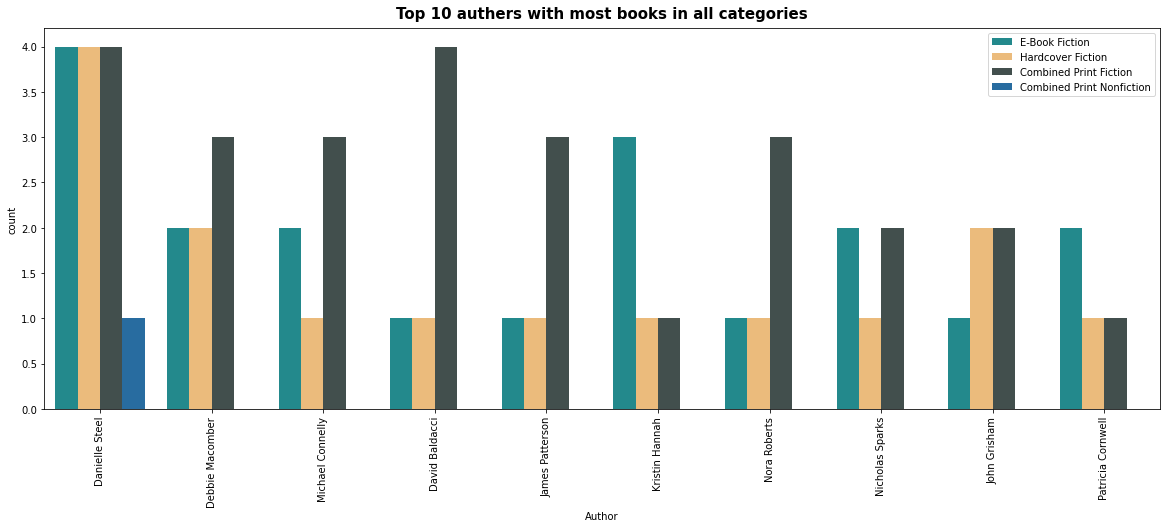

In [49]:
plt.figure(figsize=(20,7))
sns.countplot(x='Author',data=Top_authers_df,hue='Book Subcategory',palette=costum_colors)
plt.legend(loc='upper right')
plt.xticks(rotation="vertical")
plt.title('Top 10 authers with most books in all categories',fontsize= 15,pad=10,fontweight="bold")
plt.savefig('images/Top_10_authers_with_most_books.png')

In [ ]:
### Observation: The top ten authors identified in the bar chart above appear to be prolific bestsellers.
### These authors appear to be quite good at what they do.

### What are the most popular books in every category?

In [26]:
Top_rating_books_in_every_ctg=books_df.groupby(['Book Subcategory']).max()[['Total_num_of_rating']]
Top_rating_books_in_every_ctg

,Total_num_of_rating
Book Subcategory,
Combined Print Fiction,63770.0
Combined Print Nonfiction,32695.0
E-Book Fiction,87948.0
E-Book Nonfiction,51560.0
Hardcover Fiction,132607.0
Hardcover Nonfiction,59410.0


In [27]:
#Top rating books in every categories
Top_rating_books_list=[books_df.loc[books_df['Total_num_of_rating']==i] for i in Top_rating_books_in_every_ctg['Total_num_of_rating'] ]
Top_rating_books_df=pd.concat(Top_rating_books_list)
Top_rating_books_df.set_index('Book Subcategory')

,Title,Author,NYT Ranking,Amz Star ratings,Total_num_of_rating,Amazon Price,ISBN,Publisher,NYT Pub Date
Book Subcategory,,,,,,,,,
Combined Print Fiction,GONE GIRL,Gillian Flynn,9,4.1,63770.0,0.00,9780307588364,Crown,2022-02-02
Combined Print Nonfiction,UNBROKEN,Laura Hillenbrand,20,4.8,32695.0,0.00,9781400064168,Random House,2022-02-02
E-Book Fiction,THE GIRL ON THE TRAIN,Paula Hawkins,15,4.1,87948.0,7.48,9780698185395,Riverhead,2016-12-11
E-Book Nonfiction,SAPIENS,Yuval Noah Harari,5,4.6,51560.0,0.00,9780062316103,Harper,2016-12-11
Hardcover Fiction,THE MIDNIGHT LIBRARY,Matt Haig,1,4.3,132607.0,13.29,9780525559474,Viking,2022-02-06
Hardcover Nonfiction,EDUCATED,Tara Westover,11,4.7,59410.0,13.00,9780399590504,Random House,2021-09-19


In [ ]:
### Observation: The table above shows the most popular books in each category. They appear to be well-received by
### the Amazon consumers.

### Which books occur most frequently in our dataset?

In [28]:
books = books_df['Title'].value_counts().head(11)
books.to_frame()

,Title
BETRAYAL,3
THE IMMORTAL LIFE OF HENRIETTA LACKS,2
THE GUARDIAN,2
QUIET,2
THE BLACK BOX,2
UNSINKABLE,2
THE FORGOTTEN,2
WILD,2
FALLING,2
THE STORYTELLER,2


In [29]:
book_df=pd.concat([books_df.loc[books_df['Title']==i] for i in books.index])
book_df.head(11)

,Title,Author,Book Subcategory,NYT Ranking,Amz Star ratings,Total_num_of_rating,Amazon Price,ISBN,Publisher,NYT Pub Date
Amazon Product ID,,,,,,,,,,
059318632X,BETRAYAL,Jonathan Karl,Hardcover Nonfiction,14,4.8,2843.0,21.99,9780593186329,Dutton,2021-12-19
B004NEW516,BETRAYAL,Fern Michaels,E-Book Fiction,10,4.6,498.0,4.99,9781420124323,Kensington,2016-07-24
B005BUG6TI,BETRAYAL,Danielle Steel,Combined Print Fiction,17,4.6,2222.0,7.99,9780440245223,Random House Publishing,2013-02-24
1400052181,THE IMMORTAL LIFE OF HENRIETTA LACKS,Rebecca Skloot,E-Book Nonfiction,14,4.7,15603.0,12.10,9780307589385,Crown,2016-12-11
1400052181,THE IMMORTAL LIFE OF HENRIETTA LACKS,Rebecca Skloot,Combined Print Nonfiction,17,4.7,15606.0,12.10,9781400052189,Crown Publishing,2013-02-10
B000FA670W,THE GUARDIAN,Nicholas Sparks,E-Book Fiction,3,4.6,5497.0,8.99,9780759527881,Grand Central,2016-07-31
B00AHY0VN0,THE GUARDIAN,Beverly Lewis,Combined Print Fiction,20,4.8,724.0,9.99,9780764209796,Bethany House Publishers,2013-04-14
9123962984,QUIET,Susan Cain,Combined Print Nonfiction,13,5.0,3.0,40.80,9780307352156,Broadway,2022-02-02
0307352153,QUIET,Susan Cain,Combined Print Nonfiction,15,4.6,16475.0,7.73,9780307352149,Crown Publishing,2013-01-20


### Which books are the top ten most popular overall?

In [30]:
most_rated_books_df=books_df.sort_values(by="Total_num_of_rating", ascending=False).head(10)
most_rated_books_df

,Title,Author,Book Subcategory,NYT Ranking,Amz Star ratings,Total_num_of_rating,Amazon Price,ISBN,Publisher,NYT Pub Date
Amazon Product ID,,,,,,,,,,
0525559477,THE MIDNIGHT LIBRARY,Matt Haig,Hardcover Fiction,1,4.3,132607.0,13.29,9780525559474,Viking,2022-02-06
B0882VNQKS,THE FOUR WINDS,Kristin Hannah,Hardcover Fiction,15,4.5,90123.0,0.00,9781250178602,St. Martin's,2021-09-05
1594634025,THE GIRL ON THE TRAIN,Paula Hawkins,E-Book Fiction,15,4.1,87948.0,7.48,9780698185395,Riverhead,2016-12-11
1501171348,THE LAST THING HE TOLD ME,Laura Dave,Hardcover Fiction,6,4.3,67771.0,13.50,9781501171345,Simon & Schuster,2022-02-06
0062315005,THE ALCHEMIST,Paulo Coelho,E-Book Fiction,10,4.7,67078.0,8.89,9780062416216,HarperCollins,2017-01-15
B0088UT8IO,GONE GIRL,Gillian Flynn,Combined Print Fiction,9,4.1,63770.0,0.00,9780307588364,Crown,2022-02-02
0399590501,EDUCATED,Tara Westover,Hardcover Nonfiction,11,4.7,59410.0,13.00,9780399590504,Random House,2021-09-19
1501110365,IT ENDS WITH US,Colleen Hoover,E-Book Fiction,14,4.7,57852.0,12.79,9781501110375,Atria,2016-08-28
B007R07BK8,FIFTY SHADES OF GREY,E L James,Combined Print Fiction,13,4.0,56993.0,0.00,9780345803481,Vintage,2022-02-02


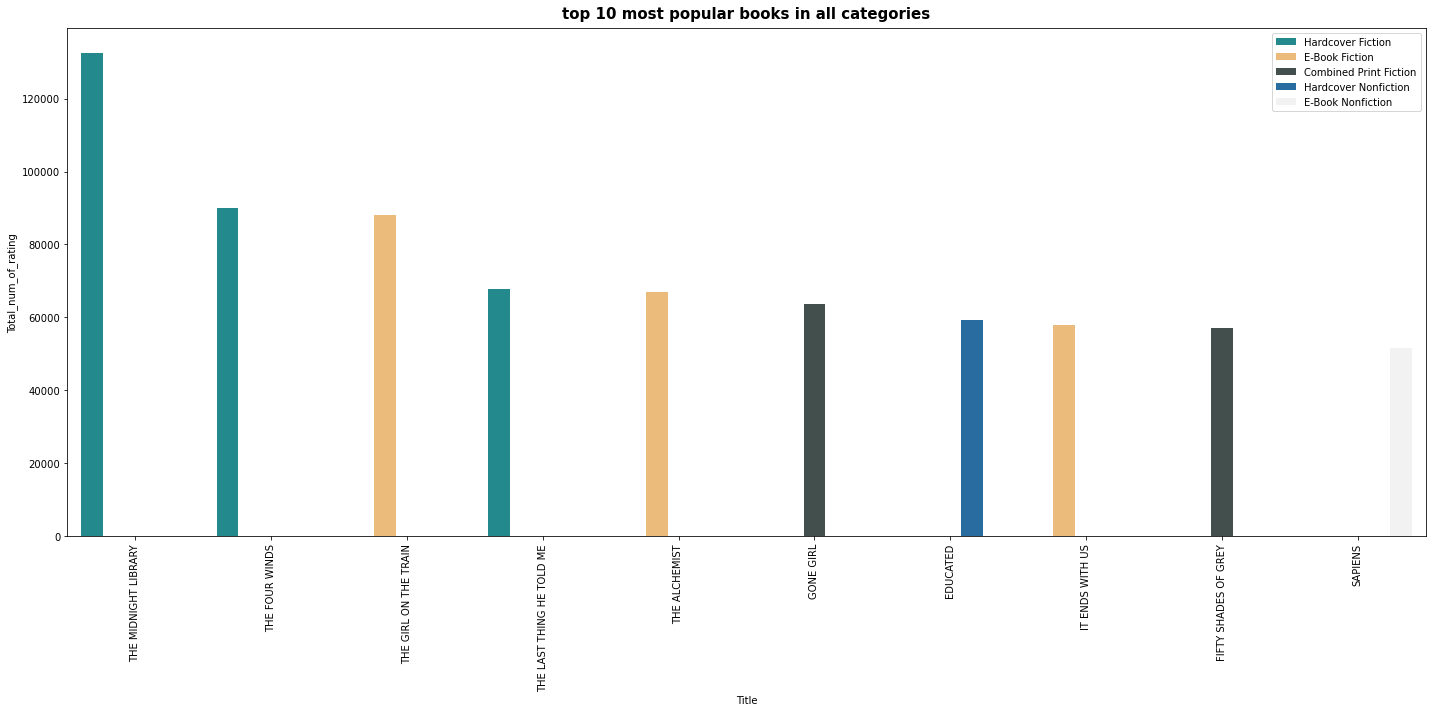

In [56]:
plt.figure(figsize=(20,10))
sns.barplot(x='Title',y='Total_num_of_rating',data=most_rated_books_df,hue='Book Subcategory',palette=costum_colors)
plt.legend(loc='upper right')
plt.xticks(rotation="vertical")
plt.title('top 10 most popular books in all categories',fontsize= 15,pad=10,fontweight="bold")
plt.tight_layout()
plt.savefig('images/top_10_most_popular-books.png')
plt.show()

In [ ]:
### Observation: The most popular books spread across different categories, primarily hardcover, e-book, and combined print. 

In [ ]:
#collapsing book categories into printed and e-book, fiction and non-fiction

In [31]:
def main_categories(x):
  
    if x in ["Hardcover Fiction","Hardcover Nonfiction","Combined Print Nonfiction","Combined Print Fiction"]:
        return "Printed"
    else:
        return "E-Book"

    
def fiction_or_not_detector(x):
    if x in ["Hardcover Fiction","Combined Print Fiction","E-Book Fiction"]:
        return "Fiction"
    
    elif x in ["Hardcover Nonfiction","Combined Print Nonfiction","E-Book Nonfiction"]:
        return "Nonfiction"
    

In [32]:
df=books_df.copy()
df['Fic_or_NotFic']= df['Book Subcategory'].apply(fiction_or_not_detector)
df["Main_category"]=df['Book Subcategory'].apply(main_categories)
df

,Title,Author,Book Subcategory,NYT Ranking,Amz Star ratings,Total_num_of_rating,Amazon Price,ISBN,Publisher,NYT Pub Date,Fic_or_NotFic,Main_category
Amazon Product ID,,,,,,,,,,,,
1982168013,TASTE,Stanley Tucci,Hardcover Nonfiction,11,4.7,3118.0,14.00,9781982168018,Gallery,2022-02-06,Nonfiction,Printed
006288834X,THE STRANGER IN THE LIFEBOAT,Mitch Albom,Hardcover Fiction,8,4.6,9966.0,15.07,9780062888341,Harper,2022-02-06,Fiction,Printed
B091XWH5T2,TO PARADISE,Hanya Yanagihara,Hardcover Fiction,10,4.2,204.0,14.99,9780385547932,Doubleday,2022-02-06,Fiction,Printed
0593465067,CALL US WHAT WE CARRY,Amanda Gorman,Hardcover Fiction,11,4.9,1794.0,14.53,9780593465066,Viking,2022-02-06,Fiction,Printed
B08TRMSR3Z,CLOUD CUCKOO LAND,Anthony Doerr,Hardcover Fiction,12,4.5,8792.0,15.99,9781982168438,Scribner,2022-02-06,Fiction,Printed
...,...,...,...,...,...,...,...,...,...,...,...,...
B009RFHNB8,"THE WALKING DEAD, RISE OF THE GOVERNOR",Robert Kirkman and Jay Bonansinga,Combined Print Fiction,18,4.5,930.0,0.00,9780312547745,St. Martin's Press,2012-11-04,Fiction,Printed
B0085DP6EY,MAD RIVER,John Sandford,Combined Print Fiction,15,4.6,3011.0,9.99,9780399157707,Penguin Group,2012-11-04,Fiction,Printed
B009R5Q51W,THE SECRET KEEPER,Kate Morton,Combined Print Fiction,12,4.5,7219.0,0.00,9781439152805,Atria Books,2012-11-04,Fiction,Printed


## What is the distribution of data (nonfiction versus fiction, and printed versus e-book)?

In [33]:
fic_df=df['Fic_or_NotFic'].value_counts()
main_cat_df=df['Main_category'].value_counts()
print(fic_df)
print("")
print(main_cat_df)

Fiction       450
Nonfiction    361
Name: Fic_or_NotFic, dtype: int64

Printed    465
E-Book     346
Name: Main_category, dtype: int64


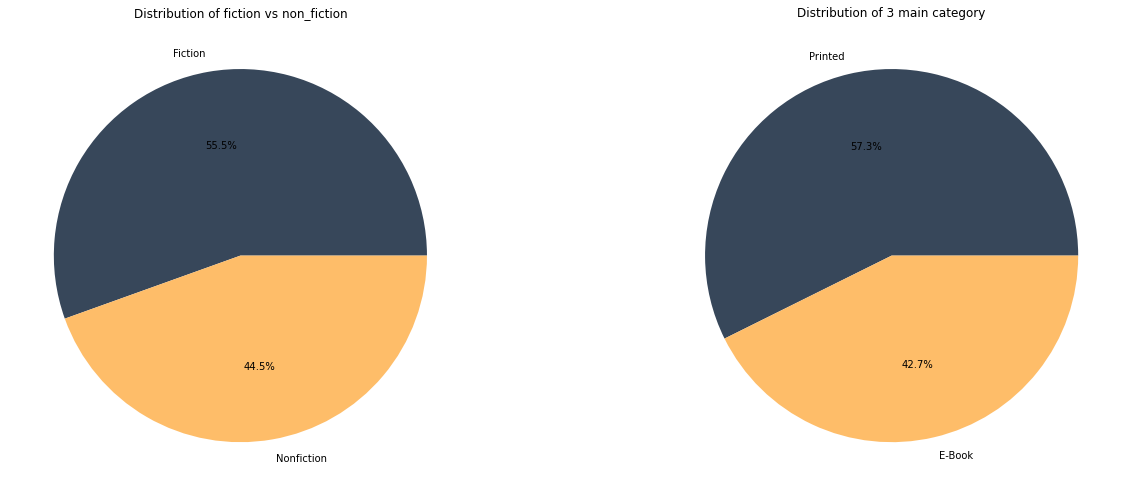

In [63]:
fig, axes = plt.subplots(1,2, figsize=(20, 7))
axes[0].pie(fic_df,labels=fic_df.index,autopct="%1.1f%%",colors=["#37475A","#FEBD69"])
axes[1].pie(main_cat_df,labels=main_cat_df.index,autopct="%1.1f%%",colors=["#37475A","#FEBD69","#11999E"])
axes[0].title.set_text('Distribution of fiction vs non_fiction')
axes[1].title.set_text('Distribution of 3 main category')
plt.tight_layout()
plt.savefig('images/books_Distribution.png')

In [ ]:
### Observation: We appear to have more ficiton than non-fiction books in our dataset.
### We also appear to have more printed book than e-books in our dataset.

## What is the average number of ratings for printed books and e-books (fiction and nonfiction)? 

In [34]:
avg_rate_df=df.groupby('Main_category').mean()['Total_num_of_rating'].sort_values(ascending=False)
avg_rate_df.to_frame()

,Total_num_of_rating
Main_category,
Printed,5661.455914
E-Book,4205.491329


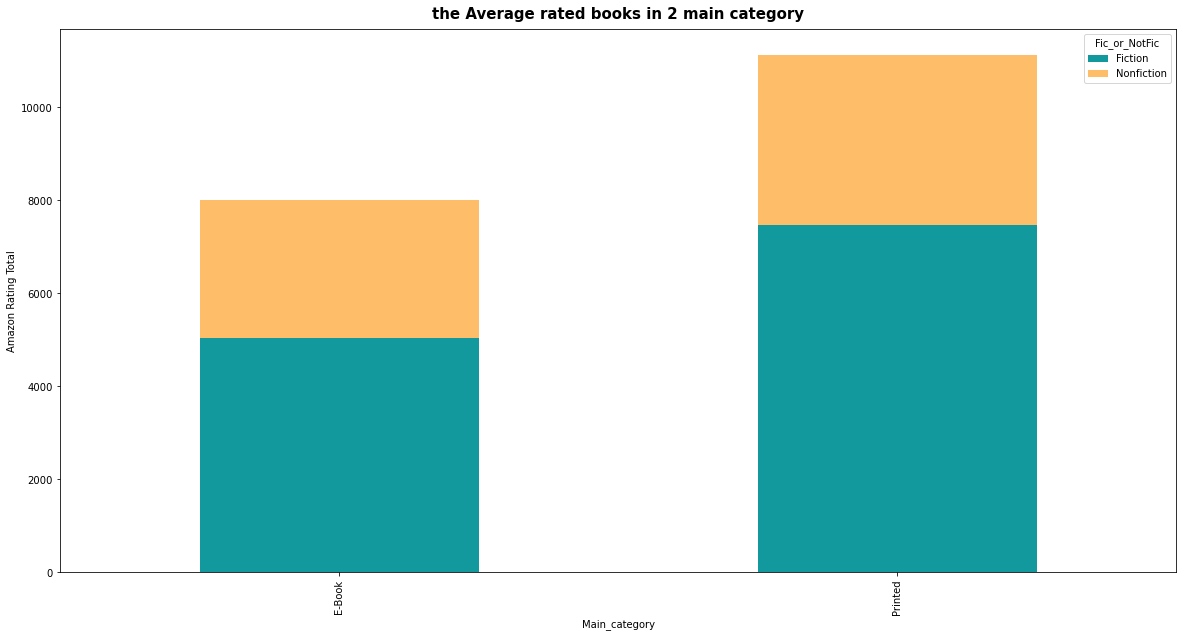

In [70]:
avg_rate_df=df.groupby(['Main_category','Fic_or_NotFic']).mean()['Total_num_of_rating'].unstack()
avg_rate_df.plot(kind='bar', stacked=True)
plt.ylabel("Amazon Rating Total")
plt.title('the Average rated books in 2 main category',fontsize= 15,pad=10,fontweight="bold")
plt.savefig('images/Average_rated_books_2_category.png')
plt.gcf().set_size_inches(20, 10)

In [ ]:
### Observation: Printed books appear to have more ratings compared to e-books, across both ficiton and nonfiction genres.

### ## What is the average Amazon price for printed books and e-books (fiction and nonfiction)? 

In [35]:
df.groupby(['Main_category','Fic_or_NotFic']).mean()['Amazon Price']

Main_category  Fic_or_NotFic
E-Book         Fiction           6.891214
               Nonfiction        7.089429
Printed        Fiction           9.901393
               Nonfiction       13.086425
Name: Amazon Price, dtype: float64

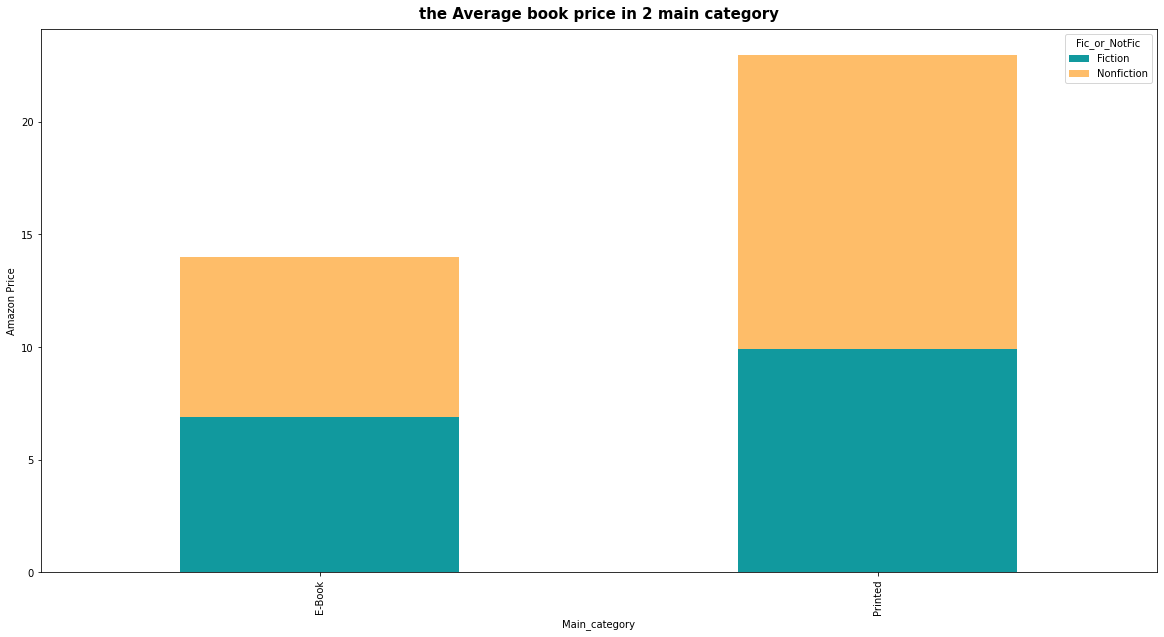

In [71]:
avg_price_df=df.groupby(['Main_category','Fic_or_NotFic']).mean()['Amazon Price'].unstack()
avg_price_df.plot(kind='bar', stacked=True)
plt.ylabel("Amazon Price")
plt.title('the Average book price in 2 main category',fontsize= 15,pad=10,fontweight="bold")
plt.gcf().set_size_inches(20, 10)
plt.savefig('images/Average_price_books_2_category.png')

In [ ]:
### Observation: Printed books appear to be more expensive than e-books.
### Nonfiction books appear to be more expensive than fiction books.

### Find  some books that are in more than one category and compare the price

In [36]:
books=df['Title'].value_counts().head(19).to_frame()
books

,Title
BETRAYAL,3
THE IMMORTAL LIFE OF HENRIETTA LACKS,2
THE GUARDIAN,2
QUIET,2
THE BLACK BOX,2
UNSINKABLE,2
THE FORGOTTEN,2
WILD,2
FALLING,2
THE STORYTELLER,2


In [37]:
book_df=pd.concat([df.loc[df['Title']==i] for i in books.index])
book_df=book_df[book_df['Amazon Price']!=0]
book_df.head(5)

,Title,Author,Book Subcategory,NYT Ranking,Amz Star ratings,Total_num_of_rating,Amazon Price,ISBN,Publisher,NYT Pub Date,Fic_or_NotFic,Main_category
Amazon Product ID,,,,,,,,,,,,
059318632X,BETRAYAL,Jonathan Karl,Hardcover Nonfiction,14,4.8,2843.0,21.99,9780593186329,Dutton,2021-12-19,Nonfiction,Printed
B004NEW516,BETRAYAL,Fern Michaels,E-Book Fiction,10,4.6,498.0,4.99,9781420124323,Kensington,2016-07-24,Fiction,E-Book
B005BUG6TI,BETRAYAL,Danielle Steel,Combined Print Fiction,17,4.6,2222.0,7.99,9780440245223,Random House Publishing,2013-02-24,Fiction,Printed
1400052181,THE IMMORTAL LIFE OF HENRIETTA LACKS,Rebecca Skloot,E-Book Nonfiction,14,4.7,15603.0,12.10,9780307589385,Crown,2016-12-11,Nonfiction,E-Book
1400052181,THE IMMORTAL LIFE OF HENRIETTA LACKS,Rebecca Skloot,Combined Print Nonfiction,17,4.7,15606.0,12.10,9781400052189,Crown Publishing,2013-02-10,Nonfiction,Printed


In [38]:
book_dfs=book_df[book_df.duplicated(subset=['Title'],keep=False)]
book_dfs.head(5)

,Title,Author,Book Subcategory,NYT Ranking,Amz Star ratings,Total_num_of_rating,Amazon Price,ISBN,Publisher,NYT Pub Date,Fic_or_NotFic,Main_category
Amazon Product ID,,,,,,,,,,,,
059318632X,BETRAYAL,Jonathan Karl,Hardcover Nonfiction,14,4.8,2843.0,21.99,9780593186329,Dutton,2021-12-19,Nonfiction,Printed
B004NEW516,BETRAYAL,Fern Michaels,E-Book Fiction,10,4.6,498.0,4.99,9781420124323,Kensington,2016-07-24,Fiction,E-Book
B005BUG6TI,BETRAYAL,Danielle Steel,Combined Print Fiction,17,4.6,2222.0,7.99,9780440245223,Random House Publishing,2013-02-24,Fiction,Printed
1400052181,THE IMMORTAL LIFE OF HENRIETTA LACKS,Rebecca Skloot,E-Book Nonfiction,14,4.7,15603.0,12.10,9780307589385,Crown,2016-12-11,Nonfiction,E-Book
1400052181,THE IMMORTAL LIFE OF HENRIETTA LACKS,Rebecca Skloot,Combined Print Nonfiction,17,4.7,15606.0,12.10,9781400052189,Crown Publishing,2013-02-10,Nonfiction,Printed


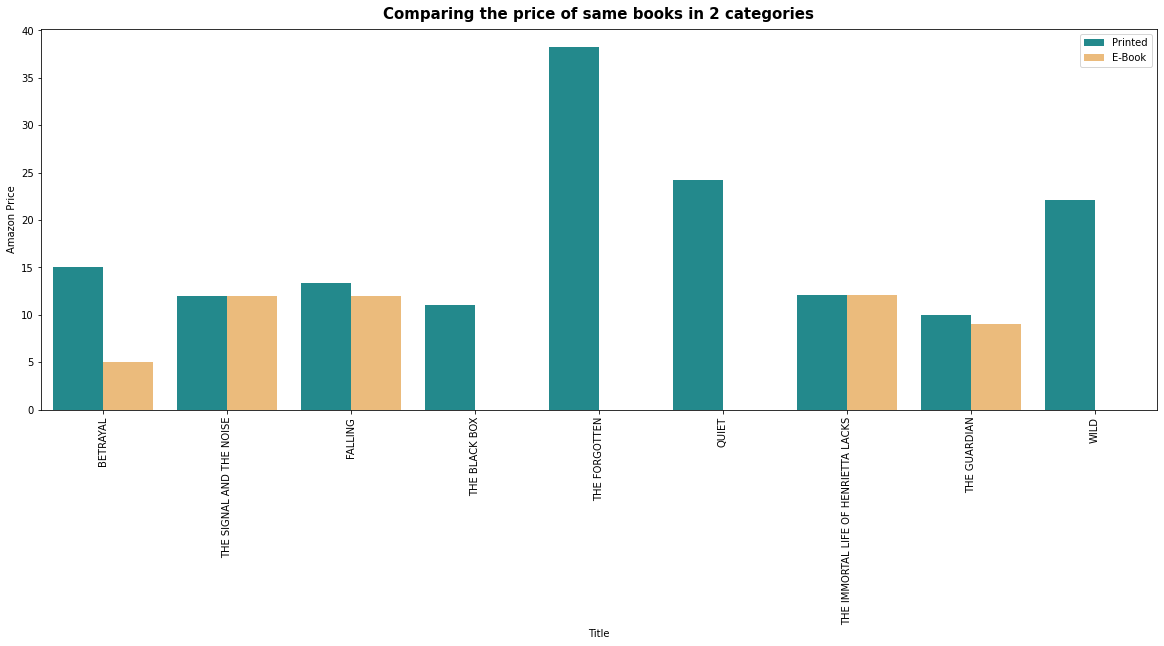

In [76]:
plt.figure(figsize=(20,7))
sns.barplot(x='Title',y='Amazon Price',data=book_dfs,hue='Main_category',palette=costum_colors,ci=None)
plt.legend(loc='upper right')
plt.xticks(rotation="vertical")
plt.title('Comparing the price of same books in 2 categories',fontsize= 15,pad=10,fontweight="bold")
plt.savefig('images/price_comparing_2_categories.png')

In [ ]:
### Observation: Among books in multiple media, printed versions appear to be more expensive than e-books.

### What is the Amazon star ratings number one NYT bestselling books?

In [39]:
rank_1_df=df.loc[df['NYT Ranking']==1][["Title","Author","NYT Ranking","Amz Star ratings","Total_num_of_rating","Main_category"]]
rank_1_df=rank_1_df.sort_values(by='Amz Star ratings', ascending=False)
rank_1_df

,Title,Author,NYT Ranking,Amz Star ratings,Total_num_of_rating,Main_category
Amazon Product ID,,,,,,
0999208314,RED-HANDED,Peter Schweizer,1,4.9,45.0,Printed
0593230574,THE 1619 PROJECT,"edited Nikole Hannah-Jones, Caitlin Roper, Il...",1,4.8,4021.0,Printed
B00BP3FDXA,FROST BURNED,Patricia Briggs,1,4.8,3554.0,Printed
B01BU1ITMI,THE WRONG SIDE OF GOODBYE,Michael Connelly,1,4.7,11767.0,E-Book
0062363603,HIDDEN FIGURES,Margot Lee Shetterly,1,4.6,5819.0,E-Book
B00A6JLDJ2,THE HIT,David Baldacci,1,4.6,11503.0,Printed
B01D8K63NG,THE SEVENTH PLAGUE,James Rollins,1,4.6,1994.0,E-Book
B018QLY6QS,FIRST STAR I SEE TONIGHT,Susan Elizabeth Phillips,1,4.6,1428.0,E-Book
B000ALAKX6,THE NAZI OFFICER'S WIFE,Edith H Beer with Susan Dworkin,1,4.6,5807.0,E-Book


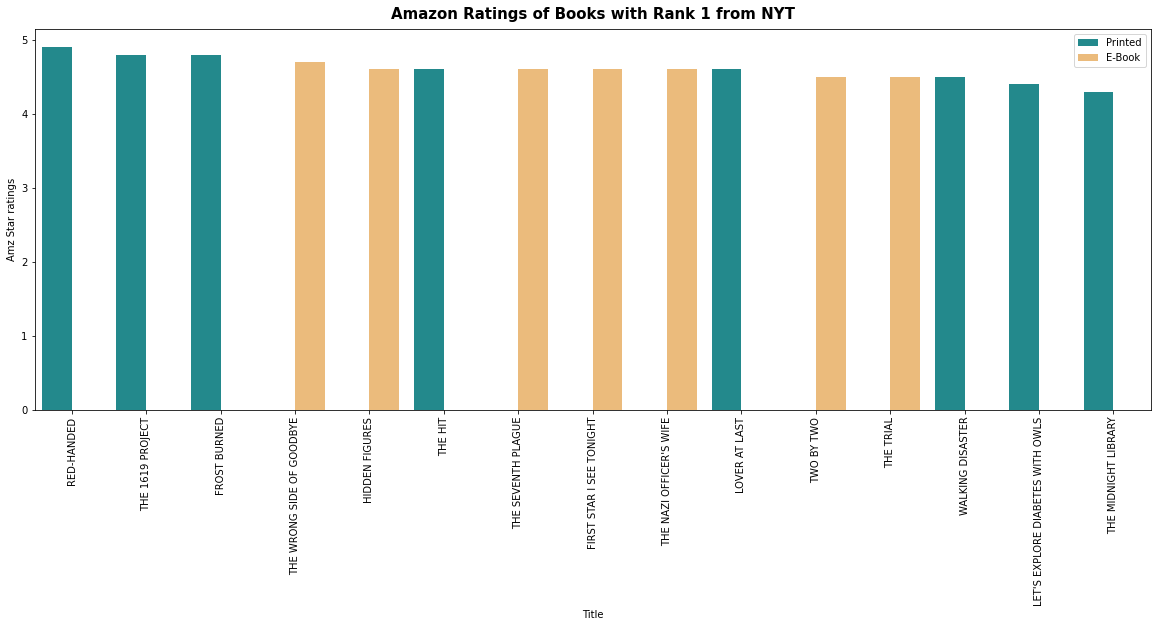

<Figure size 432x288 with 0 Axes>

In [79]:
plt.figure(figsize=(20,7))
sns.barplot(x='Title',y='Amz Star ratings',data=rank_1_df,hue="Main_category",palette=costum_colors)
plt.xticks(rotation="vertical")
plt.title('Amazon Ratings of Books with Rank 1 from NYT',fontsize= 15,pad=10,fontweight="bold")
plt.legend(loc='upper right')
plt.show()
plt.savefig('images/Amazon_Ratings_vs_NYT_ranking.png')

In [ ]:
### Observation: The number on NYT best selling books were also highly rated on Amazon.

### What is the most famous books in the printed book and e-book categories?

In [40]:
two_most_famous_book=df.groupby('Main_category').max()['Total_num_of_rating']
two_most_famous_book

Main_category
E-Book      87948.0
Printed    132607.0
Name: Total_num_of_rating, dtype: float64

In [41]:
Top_rating_books_list=[df.loc[df['Total_num_of_rating']==i] for i in two_most_famous_book]
Top_rating_books_df=pd.concat(Top_rating_books_list)
Top_rating_books_df.set_index('Main_category')[['Title','Author','Amz Star ratings','Total_num_of_rating','Book Subcategory']]

,Title,Author,Amz Star ratings,Total_num_of_rating,Book Subcategory
Main_category,,,,,
E-Book,THE GIRL ON THE TRAIN,Paula Hawkins,4.1,87948.0,E-Book Fiction
Printed,THE MIDNIGHT LIBRARY,Matt Haig,4.3,132607.0,Hardcover Fiction


In [ ]:
### Observation: "The Midnight Library" is the most popular printed book, 
### and "The Girl on the Train" is the most popular e-book.

# The 10 most expensive books and their categories

In [42]:
most_rated_books_df=df.sort_values(by="Amazon Price", ascending=False).head(10)
most_rated_books_df

,Title,Author,Book Subcategory,NYT Ranking,Amz Star ratings,Total_num_of_rating,Amazon Price,ISBN,Publisher,NYT Pub Date,Fic_or_NotFic,Main_category
Amazon Product ID,,,,,,,,,,,,
163149256X,THE LYRICS: 1956 TO THE PRESENT,Paul McCartney,Hardcover Nonfiction,10,4.8,1781.0,90.00,9781631492563,Liveright,2022-01-23,Nonfiction,Printed
9124120162,THE BOMBER MAFIA,Malcolm Gladwell,Hardcover Nonfiction,13,5.0,1.0,89.72,9780316296618,"Little, Brown",2021-08-29,Nonfiction,Printed
9124125288,PROJECT HAIL MARY,Andy Weir,Hardcover Fiction,14,5.0,2.0,79.90,9780593135204,Ballantine,2022-01-02,Fiction,Printed
9124143693,PERIL,Bob Woodward and Robert Costa,Hardcover Nonfiction,9,2.5,2.0,64.99,9781982182915,Simon & Schuster,2022-01-23,Nonfiction,Printed
9123978724,THE FORGOTTEN,David Baldacci,Combined Print Fiction,19,4.8,9.0,64.47,9781455523153,Grand Central,2022-02-02,Fiction,Printed
1984859501,THERE AND BACK,Jimmy Chin,Hardcover Nonfiction,7,4.6,613.0,45.00,9781984859501,Ten Speed,2021-12-26,Nonfiction,Printed
9123962984,QUIET,Susan Cain,Combined Print Nonfiction,13,5.0,3.0,40.80,9780307352156,Broadway,2022-02-02,Nonfiction,Printed
B01NCT5R2J,WILD,Cheryl Strayed,Combined Print Nonfiction,5,4.7,5.0,34.99,9780307476074,Vintage,2022-02-02,Nonfiction,Printed
0062193643,ROLL ME UP AND SMOKE ME WHEN I DIE,Willie Nelson,Combined Print Nonfiction,17,4.5,968.0,34.00,9780062193643,HarperCollins Publishers,2013-01-20,Nonfiction,Printed


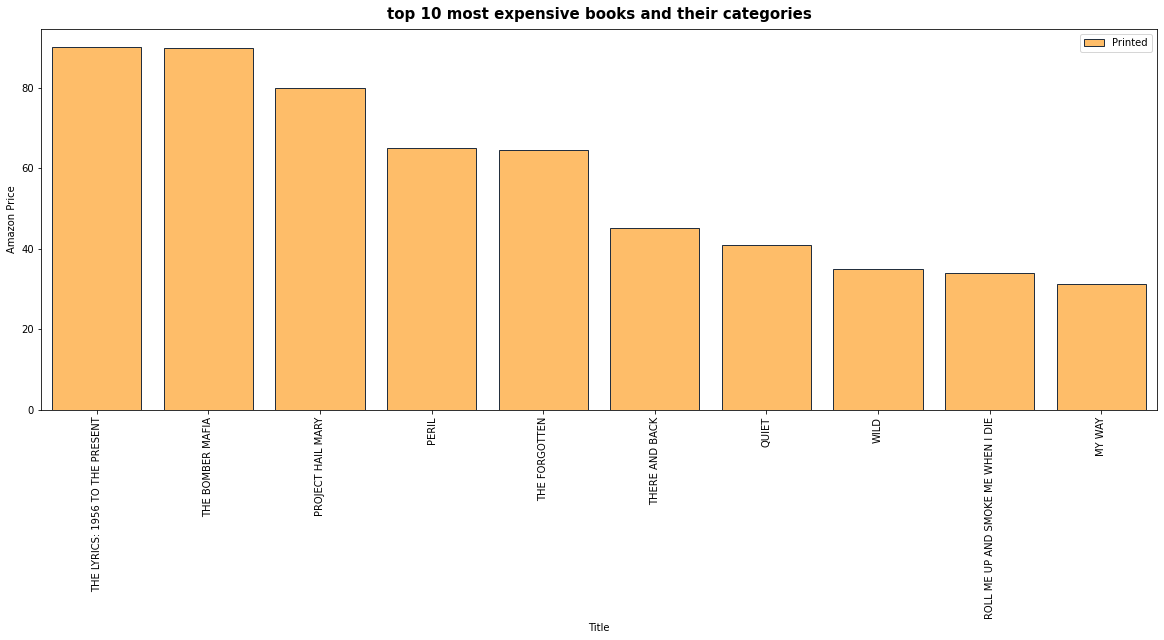

<Figure size 432x288 with 0 Axes>

In [84]:
plt.figure(figsize=(20,7))
sns.barplot(x='Title',y='Amazon Price',data=most_rated_books_df,hue='Main_category',facecolor='#FEBD69',edgecolor='#232F3E')
plt.legend(loc='upper right')
plt.xticks(rotation="vertical")
plt.title('top 10 most expensive books and their categories',fontsize= 15,pad=10,fontweight="bold")
plt.show()
plt.savefig('images/10_most_expensive_books.png')

In [ ]:
### Observation: The top ten most expensive books are all printed books.

## Which genre is the most popular: fiction or nonfiction?

In [43]:
fic_not_df=df.groupby('Fic_or_NotFic').mean()['Total_num_of_rating']
fic_not_df.to_frame()

,Total_num_of_rating
Fic_or_NotFic,
Fiction,6354.757778
Nonfiction,3401.761773


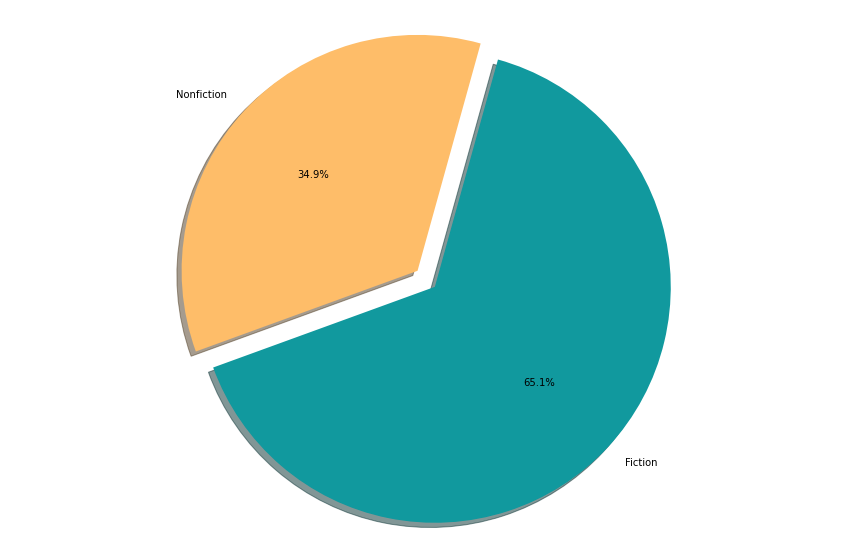

In [87]:
plt.figure(figsize=(15,10))
colors = ["#11999E","#FEBD69"]
explode = (0.1,0)

plt.pie(fic_not_df, explode=explode, labels=fic_not_df.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

plt.axis("equal")
plt.savefig('images/Fic_not_fic_popularity.png')
plt.show()

## Which category of book is the most popular: e-book or printed?

In [44]:
printed_e_book_df=df.groupby('Main_category').mean()['Total_num_of_rating']
printed_e_book_df.to_frame()

,Total_num_of_rating
Main_category,
E-Book,4205.491329
Printed,5661.455914


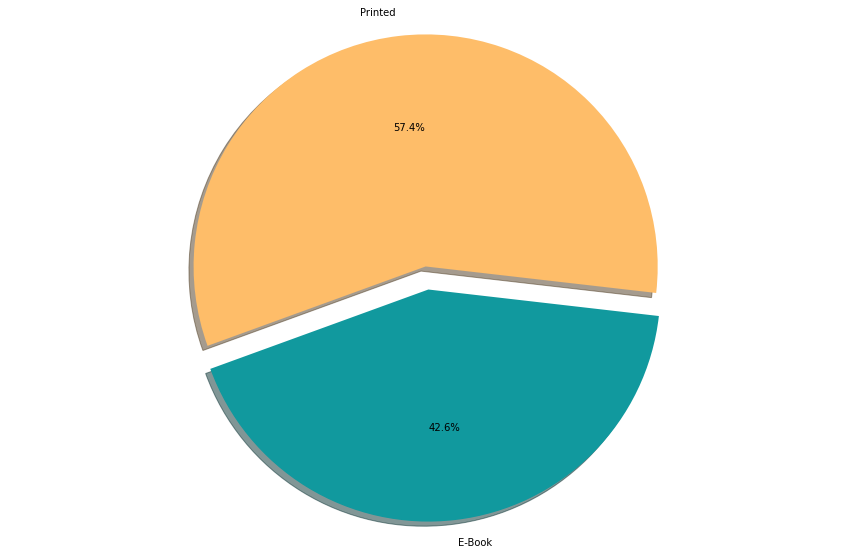

In [90]:
plt.figure(figsize=(15,10))
colors = ["#11999E","#FEBD69"]
explode = (0.1,0)

plt.pie(printed_e_book_df, explode=explode, labels=printed_e_book_df.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

plt.axis("equal")
plt.savefig('images/E_book_or_Printed_popularity.png')

plt.show()

In [ ]:
### Observation: Printed books appear to be the most popular.

### Which genre has the highest star rating: fiction or nonfiction?

In [45]:
fic_not_df=df.groupby('Fic_or_NotFic').mean()['Amz Star ratings']
fic_not_df.to_frame()

,Amz Star ratings
Fic_or_NotFic,
Fiction,4.465333
Nonfiction,4.544875


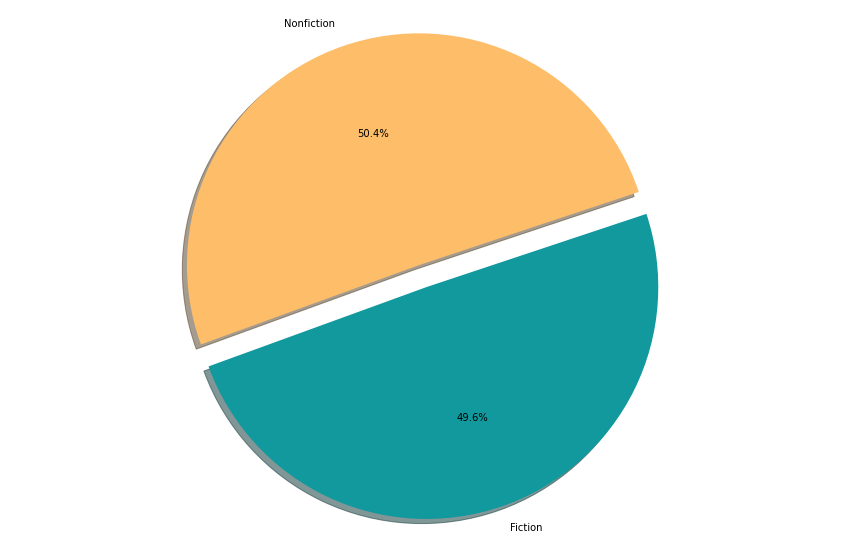

In [92]:
plt.figure(figsize=(15,10))
colors = ["#11999E","#FEBD69"]
explode = (0.1,0)

plt.pie(fic_not_df, explode=explode, labels=fic_not_df.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

plt.axis("equal")
plt.savefig('images/Fic_not_fic_rate_star.png')


plt.show()

In [ ]:
### Observation: Nonfiction and fiction books appear to be about equal in terms of ratings on Amazon.

### Which category has the highest star rating: e-book or printed book?

In [46]:
printed_e_book_df=df.groupby('Main_category').mean()['Amz Star ratings']
printed_e_book_df.to_frame()

,Amz Star ratings
Main_category,
E-Book,4.506358
Printed,4.496559


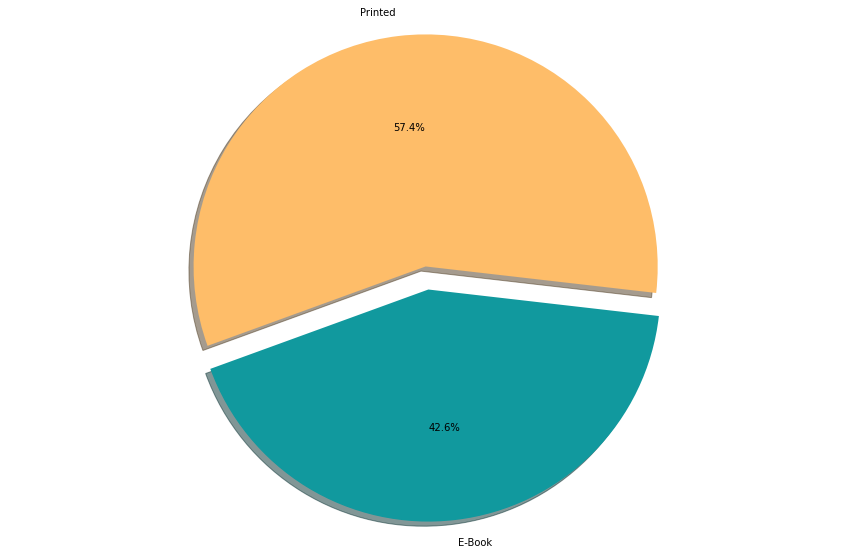

In [93]:
plt.figure(figsize=(15,10))
colors = ["#11999E","#FEBD69"]
explode = (0.1,0)

plt.pie(printed_e_book_df, explode=explode, labels=printed_e_book_df.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

plt.axis("equal")
plt.savefig('images/E_book_or_Printed_rate_star.png')

plt.show()

In [ ]:
### Observation: Printed books appear to have more highly rated books than e-books.

### The distribution of total Amazon ratings between e-books and printed books

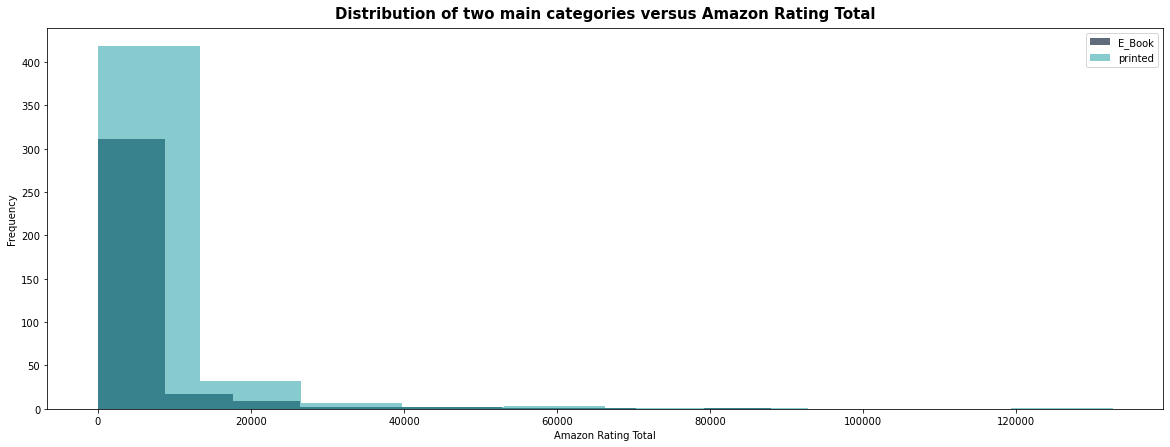

In [47]:
E_Book_df=df[df['Main_category']=='E-Book']
printed_df=df[df['Main_category']=='Printed']
plt.figure(figsize=(20,7))
E_Book_df['Total_num_of_rating'].plot(kind='hist',label='E_Book',alpha=.8,color='#37475A')
printed_df['Total_num_of_rating'].plot(kind='hist',label='printed',alpha=.5,color='#11999E')
plt.legend()
plt.title('Distribution of two main categories versus Amazon Rating Total',fontsize= 15,pad=10,fontweight="bold")
plt.xlabel("Amazon Rating Total")
plt.ylabel("Frequency")
plt.savefig('images/Distribution_main_cat.png')

In [ ]:
### Observation: Printed books appear to have a higher number of ratings compared to e-books. 

## Hypothesis with Two-Samples T-Test

### The purpose of analysis: determine whether there is a difference in popularity (number of ratings) between printed book and e-books.

H0: The variance among each group is equal.

HA: At least one group has a variance that is not equal to the rest.

<Figure size 1440x1440 with 0 Axes>

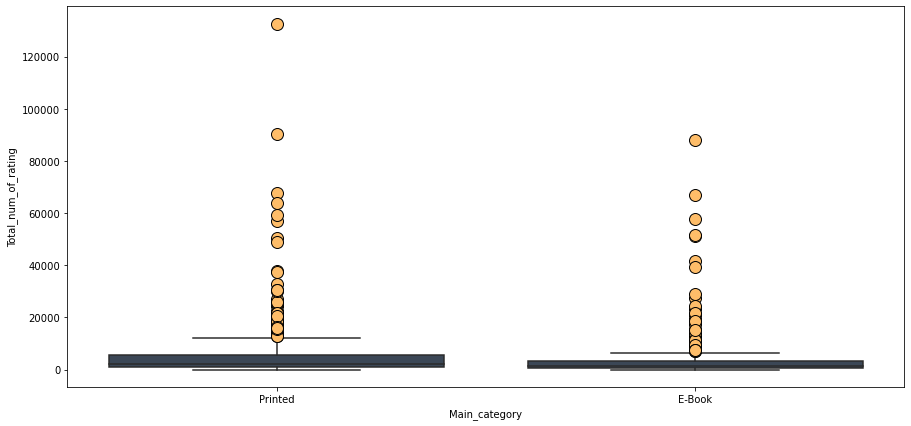

In [97]:
plt.figure(figsize=(20, 20))
flierprops = dict(marker='o', markerfacecolor="#FEBD69", markersize=12,
                  markeredgecolor='black')
plt.figure(figsize=(15,7))
sns.boxplot(x='Main_category',y='Total_num_of_rating',data=df,color="#37475A",flierprops=flierprops)
plt.savefig('images/box_plot.png') 


In [48]:
# Extract individual groups
group1 = df[df["Main_category"] == "E-Book"]["Total_num_of_rating"]
group2 = df[df["Main_category"] == "Printed"]["Total_num_of_rating"]

In [55]:
#obtaining the mean of each group of interest
print(group1.mean())
print(group2.mean())

4205.491329479769
5661.455913978494


In [52]:
#perform Shapiro-Wilk test to assess normality before proceeding wtih two-samples t-test
from scipy.stats import shapiro

#perform Shapiro-Wilk test
print(shapiro(group1))
print(shapiro(group2))

ShapiroResult(statistic=0.4217330813407898, pvalue=8.413598465021821e-32)
ShapiroResult(statistic=0.4592691659927368, pvalue=3.963305764590485e-35)


The results of the Shapiro-Wilk test reveal that our groups are not normally distributed (for instance, W = 0.42, p < 0.01). Therefore, we can reject the null hypothesis that the groups have a normal distribution. Thus, we cannot perform the standard two samples t-test.

We will perform the non-parametric version of the two samples t-test, Mann-Whitney U Test, to determine if the groups differ in popularity. This test will allow us to test our hypothesis with non-normally distributed groups.

In [53]:
#performing Mann Whitney (non-parametric equivalent of the t-test)
stats.mannwhitneyu(group1, group2, alternative='two-sided')


MannwhitneyuResult(statistic=68449.0, pvalue=0.0002774191076400834)

The results of our Mann-Whitney U Test reveal that there is a statistically significant difference between printed books an e-books in popularity (U = 68,449, p < 0.01), such that e-books (M = 5661.46) were more popular on Amazon compared to printed books (M = 4205.49). 